<a href="https://colab.research.google.com/github/OSalmona/et3-Tasks/blob/main/et3_Datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount my drive to GoogleColab local workspace

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import OS library to careate new directory in local workspace 
copy CSV file from Drive to new Directory

In [51]:
# mount my google drive ehre i save dataset then copy it to local workspace
import os 
!mkdir DataSet
!cp -r /content/drive/My\ Drive/et3/* /content/DataSet

mkdir: cannot create directory ‘DataSet’: File exists


Import Mandatory libraies to deal with dataframes and Visulaization

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [53]:
import numpy as np
import pandas as pd

Read CSV file to panda DataFrame

In [54]:
df = pd.read_csv('DataSet/drinkMenu.csv')
print(df.shape)
df.head()

(242, 18)


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


We Find a problem in label of columns 
so i decided to remove all sapces

In [55]:
df.columns = df.columns.str.replace(' ', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Beverage_category      242 non-null    object 
 1   Beverage               242 non-null    object 
 2   Beverage_prep          242 non-null    object 
 3   Calories               242 non-null    int64  
 4   TotalFat(g)            242 non-null    object 
 5   TransFat(g)            242 non-null    float64
 6   SaturatedFat(g)        242 non-null    float64
 7   Sodium(mg)             242 non-null    int64  
 8   TotalCarbohydrates(g)  242 non-null    int64  
 9   Cholesterol(mg)        242 non-null    int64  
 10  DietaryFibre(g)        242 non-null    int64  
 11  Sugars(g)              242 non-null    int64  
 12  Protein(g)             242 non-null    float64
 13  VitaminA(%DV)          242 non-null    object 
 14  VitaminC(%DV)          242 non-null    object 
 15  Calciu

Find some issuses in rows and change data types of columns

In [56]:
df['TotalFat(g)']= df['TotalFat(g)'].str.replace(' ', '.')
df['TotalFat(g)'] = df['TotalFat(g)'].astype(float)
df['Sodium(mg)'] = df['Sodium(mg)'].astype(float)
df['TotalCarbohydrates(g)'] = df['TotalCarbohydrates(g)'].astype(float)
df['Cholesterol(mg)'] = df['Cholesterol(mg)'].astype(float)
df['DietaryFibre(g)'] = df['DietaryFibre(g)'].astype(float)
df['Sugars(g)'] = df['Sugars(g)'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Beverage_category      242 non-null    object 
 1   Beverage               242 non-null    object 
 2   Beverage_prep          242 non-null    object 
 3   Calories               242 non-null    int64  
 4   TotalFat(g)            242 non-null    float64
 5   TransFat(g)            242 non-null    float64
 6   SaturatedFat(g)        242 non-null    float64
 7   Sodium(mg)             242 non-null    float64
 8   TotalCarbohydrates(g)  242 non-null    float64
 9   Cholesterol(mg)        242 non-null    float64
 10  DietaryFibre(g)        242 non-null    float64
 11  Sugars(g)              242 non-null    float64
 12  Protein(g)             242 non-null    float64
 13  VitaminA(%DV)          242 non-null    object 
 14  VitaminC(%DV)          242 non-null    object 
 15  Calciu

We find caffeine values = varies that it mean it is change or do nnot have constant value so we can not depend on it in statistics

In [57]:
df = df[df["Caffeine(mg)"] != "varies"]
df = df[df["Caffeine(mg)"] != "Varies"]

df["Caffeine(mg)"] = df['Caffeine(mg)'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Beverage_category      220 non-null    object 
 1   Beverage               220 non-null    object 
 2   Beverage_prep          220 non-null    object 
 3   Calories               220 non-null    int64  
 4   TotalFat(g)            220 non-null    float64
 5   TransFat(g)            220 non-null    float64
 6   SaturatedFat(g)        220 non-null    float64
 7   Sodium(mg)             220 non-null    float64
 8   TotalCarbohydrates(g)  220 non-null    float64
 9   Cholesterol(mg)        220 non-null    float64
 10  DietaryFibre(g)        220 non-null    float64
 11  Sugars(g)              220 non-null    float64
 12  Protein(g)             220 non-null    float64
 13  VitaminA(%DV)          220 non-null    object 
 14  VitaminC(%DV)          220 non-null    object 
 15  Calciu

Convert all numaric column to float or int

In [58]:
df['VitaminA(%DV)']= df['VitaminA(%DV)'].str.replace('%', '')
df['VitaminC(%DV)']= df['VitaminC(%DV)'].str.replace('%', '')
df['Calcium(%DV)']= df['Calcium(%DV)'].str.replace('%', '')
df['Iron(%DV)']= df['Iron(%DV)'].str.replace('%', '')
df['Iron(%DV)']= df['Iron(%DV)'].str.replace('.00', '')

df['VitaminA(%DV)']= df['VitaminA(%DV)'].astype(int)
df['VitaminC(%DV)']= df['VitaminC(%DV)'].astype(int)
df['Calcium(%DV)']= df['Calcium(%DV)'].astype(int)
df['Iron(%DV)']= df['Iron(%DV)'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Beverage_category      220 non-null    object 
 1   Beverage               220 non-null    object 
 2   Beverage_prep          220 non-null    object 
 3   Calories               220 non-null    int64  
 4   TotalFat(g)            220 non-null    float64
 5   TransFat(g)            220 non-null    float64
 6   SaturatedFat(g)        220 non-null    float64
 7   Sodium(mg)             220 non-null    float64
 8   TotalCarbohydrates(g)  220 non-null    float64
 9   Cholesterol(mg)        220 non-null    float64
 10  DietaryFibre(g)        220 non-null    float64
 11  Sugars(g)              220 non-null    float64
 12  Protein(g)             220 non-null    float64
 13  VitaminA(%DV)          220 non-null    int64  
 14  VitaminC(%DV)          220 non-null    int64  
 15  Calciu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


Check for naiive duplicates in dataset

In [59]:
# Check if we Have Duplicated row so we should remove it
# Remove Duplicate for full rows
print("data shape before remove dublication , ", df.shape)
df = df.drop_duplicates()
print("data shape after remove dublication , ", df.shape)
# Conclusion we don't have duplicated rows

data shape before remove dublication ,  (220, 18)
data shape after remove dublication ,  (220, 18)


Check for null value we found only one so we can remove it or fill it 
i decided to fill it by zero

In [60]:
# Full null values
# We will take an average of column in for each sub gateogry
# df.iloc[row_start:row_end , col_start, col_end]
# First We will check all coumn summetion of his null values

# null in caffeine column only

df["Caffeine(mg)"] = df["Caffeine(mg)"].fillna(0)


In [61]:
# df = df.drop(labels=['Beverage_category','Beverage_prep', 'TransFat(g)','SaturatedFat(g)',], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Beverage_category      220 non-null    object 
 1   Beverage               220 non-null    object 
 2   Beverage_prep          220 non-null    object 
 3   Calories               220 non-null    int64  
 4   TotalFat(g)            220 non-null    float64
 5   TransFat(g)            220 non-null    float64
 6   SaturatedFat(g)        220 non-null    float64
 7   Sodium(mg)             220 non-null    float64
 8   TotalCarbohydrates(g)  220 non-null    float64
 9   Cholesterol(mg)        220 non-null    float64
 10  DietaryFibre(g)        220 non-null    float64
 11  Sugars(g)              220 non-null    float64
 12  Protein(g)             220 non-null    float64
 13  VitaminA(%DV)          220 non-null    int64  
 14  VitaminC(%DV)          220 non-null    int64  
 15  Calciu

i can obcerve that each drink can preates with different values . not normal so i decided to keep only one which have highest calories and sugar and remove other column which we won't use in this project

In [62]:
# i think we have duplicated rows by Beverage_category / Beverage / Beverage_prep
# We will keep only max row depend on calories - sugar
df2 = df.groupby(['Beverage_category','Beverage','Beverage_prep'])['Calories','Sugars(g)'].max().reset_index()
df2.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Beverage_category,Beverage,Beverage_prep,Calories,Sugars(g)
0,Classic Espresso Drinks,Caffè Americano,Grande,15,0.0
1,Classic Espresso Drinks,Caffè Americano,Short,5,0.0
2,Classic Espresso Drinks,Caffè Americano,Tall,10,0.0
3,Classic Espresso Drinks,Caffè Americano,Venti,25,0.0
4,Classic Espresso Drinks,Caffè Latte,2% Milk,240,22.0
5,Classic Espresso Drinks,Caffè Latte,Grande Nonfat Milk,130,18.0
6,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,9.0
7,Classic Espresso Drinks,Caffè Latte,Soymilk,190,11.0
8,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,14.0
9,Classic Espresso Drinks,Caffè Latte,Venti Nonfat Milk,170,23.0


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Beverage_category  136 non-null    object 
 1   Beverage           136 non-null    object 
 2   Beverage_prep      136 non-null    object 
 3   Calories           136 non-null    int64  
 4   Sugars(g)          136 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.4+ KB


Visulaize only top drinks which have higest calories

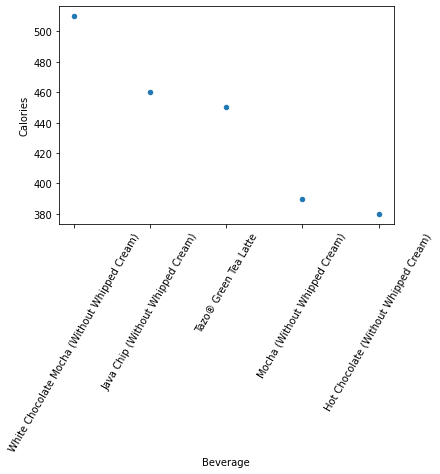

In [64]:
# series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
temp = df2.groupby('Beverage')['Calories'].max().reset_index()
# temp.
temp = temp.sort_values(by="Calories",ascending=False)
temp = temp.head(5)


temp.plot(kind = 'scatter', x = 'Beverage', y = 'Calories')
plt.xticks(rotation=60)

plt.show()

#  drink has the highest calories from the dataset 
# White Chocolate Mocha (Without Whipped Cream)

Visulaize only top drinks which have higest Sugar

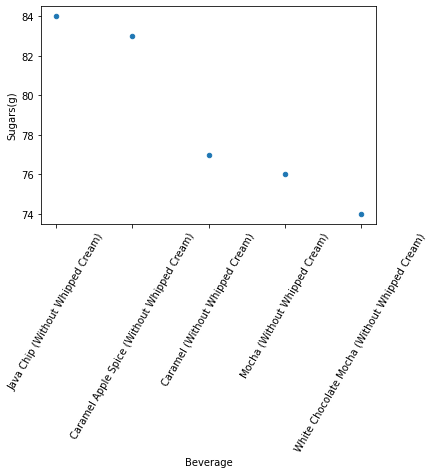

In [65]:
temp = df2.groupby('Beverage')['Sugars(g)'].max().reset_index()
# temp.
temp = temp.sort_values(by="Sugars(g)",ascending=False)
temp = temp.head(5)


temp.plot(kind = 'scatter', x = 'Beverage', y = 'Sugars(g)')
plt.xticks(rotation=60)

plt.show()

#  drink has the highest Sugar from the dataset 
# Lava Chip (without whipped Cream)